## Event Data Analytics Exercise

The exercise is to undertake analysis of event data very similar to the data analysed within the Tobii ATEX project. 
The data is received as a stream of events related to an individuals browsing behaviour, with each event having a number
of properties which describe the users browsing.
<br>

We would encourage you to work on three analytical questions and explore the data to try and answer them. When working
on these questions we are particularly interested in your approach and conclusions along with your analysis. Suggestions
of questions to analyse appear at the bottom of this document. Please choose the questions as follows:
    
    1. Answer one of the `Analytical Question Suggestions`
    2. Answer one of the `Modeling Question Suggestions`
    3. Answer one  question of your own design which you find interesting

<br>
The data itself can be found in the file `sample_data_190819.tar.gz`. As part of your interview with Tobii
we will ask you to present your analysis and we will discuss this for a period of one hour.
<br>

### FAQ's

1. Do I have to conduct this in Python or complete the analysis in a jupyter notebook?. <br> 
_No we would encourage you to undertake the analysis in a language, tool or environment you feel comfortable using_
a jupyter notebook in python has only been used here to help illustrate the task<br> 

1. Should I just limit this analysis to 3 questions and how long should I spend?. <br> 
_We would encourage you to only complete 3 tasks as written above, the tasks are broad enough to allow you to explore
the data and the analysis should be short enough to discuss within 1 hour_

### Event Data Model

The event data can be found within the file `sample_data_120819.tar.gz. It contains the following fields:
    
- `event_time_stamp` :- ISO formatted timestamp of when the event occured **[timestamp]**
- `beacon_id` :- id for the beacon this event is related too **[str] **
- `content_type` :- content_type of the event **[categorical str]**
- `content`:- content object containing descriptors of the event  **[JSON object]**
    
<br>

In order to understand these events it is important to note that they desrcibe the behaviour of **beacons** which appear
within an individuals browsing sessions. A **beacon** is an area of the website that a user is browsing, which is of
interest to the ATEX project, normally an advertisement. We monitor these advertisements and record the following events
for them (which can be found as the variable `content-type` in the attached dataset):

* `application/vnd.tobii.atex.beacon-detected-event-v1+json`:- initial rendering of the beacon on the webpage
* `application/vnd.tobii.atex.beacon-updated-event-v1+json`:- the beacon is modified, normally html changes
* `application/vnd.tobii.atex.beacon-removed-event-v1+json`:- the beacon is removed from the webpage
* `application/vnd.tobii.atex.beacon-in-view-event-v1+json`:- the beacon becomes visible within the individuals screen


There is also a final content-type `application/vnd.tobii.atex.session-started-event-v1+json` which is not associated
with a beaco. This event is triggered when a new url being is loaded in the browser. This defines a new **session** within the data. These
two concepts **sessions** and **beacons** are related by a hierarchy where every beacon should be assoicated with a 
session.


### Example Initial Analysis

The following cells contain a simple initial analysis of the data to illustrate how you might proceed to analyse the data.

Some useful python libraries for analysis are imported and the data loaded into the notebook

In [82]:
# The commands in this cell should be run if you do not have the required python packages in your environment
#import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install pandas

In [83]:
import pandas as pd
import numpy as np

In [84]:
df = pd.read_csv('sample_data_190819.csv')

Before proceeding to analyse the data we view it to check it is loaded correctly and get a feel od the data we have.

In [85]:
df.head()

,event_time_stamp,beacon_id,content_type,content
0,2019-08-19 10:12:30.854 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
1,2019-08-19 10:12:43.505 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
2,2019-08-19 10:12:50.689 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
3,2019-08-19 10:13:01.101 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."
4,2019-08-19 10:13:08.773 Europe/Stockholm,NaN,application/vnd.tobii.atex.session-started-eve...,"{""geo"":{""country"":{""name"":""Sweden"",""iso_3166_1..."


In [86]:
df.describe()

,event_time_stamp,beacon_id,content_type,content
count,2910,2324,2910,2910
unique,1495,1183,5,2910
top,2019-08-13 21:33:21.336 Europe/Stockholm,0be56815-1065-4d17-8c5d-aef1e0bd3b10,application/vnd.tobii.atex.beacon-detected-eve...,"{""request"":{""headers"":{""x-forward-cloudfront-f..."
freq,17,9,1182,1


This simple example analysis will look at the time distribution of events we have data for. 

The `event_time_stamp` column is currently formatted as an object and should be changed to a datetime? in order to
allows us to manipulate and analyse it.

In [87]:
from datetime import datetime

### convert the string timestamps into datetime objects for analysis
def convert_to_datetime_hour(string, date_format='%Y-%m-%d %H:%M:%S.%f'):
    tz_naive_string = string[:23]
    datetime_string = datetime.strptime(tz_naive_string, date_format)
    return datetime_string.replace(minute=0, second=0, microsecond=0)
    
df['datetime_hour'] = df['event_time_stamp'].apply(lambda x: convert_to_datetime_hour(x))

In [88]:
keep_columns = ['datetime_hour', 'content_type']
# group the data set by 'datetime' object and count the number of events
df_date_time = df.loc[:, keep_columns].groupby('datetime_hour').count().reset_index()
df_date_time.columns = ['Hour', 'Number_Events']
print(df_date_time)

                  Hour  Number_Events
0  2019-08-13 21:00:00            126
1  2019-08-13 22:00:00              8
2  2019-08-14 09:00:00            256
3  2019-08-14 10:00:00             47
4  2019-08-14 11:00:00              5
5  2019-08-15 15:00:00              2
6  2019-08-15 16:00:00             31
7  2019-08-15 17:00:00            198
8  2019-08-15 18:00:00             21
9  2019-08-15 20:00:00            219
10 2019-08-16 07:00:00             97
11 2019-08-16 10:00:00             24
12 2019-08-16 11:00:00             36
13 2019-08-16 14:00:00            170
14 2019-08-16 15:00:00            144
15 2019-08-16 16:00:00            156
16 2019-08-16 17:00:00             12
17 2019-08-17 22:00:00             20
18 2019-08-17 23:00:00             35
19 2019-08-18 10:00:00             25
20 2019-08-18 11:00:00             31
21 2019-08-18 12:00:00            219
22 2019-08-18 13:00:00            187
23 2019-08-18 15:00:00            122
24 2019-08-18 16:00:00            241
25 2019-08-1

In [89]:
import matplotlib

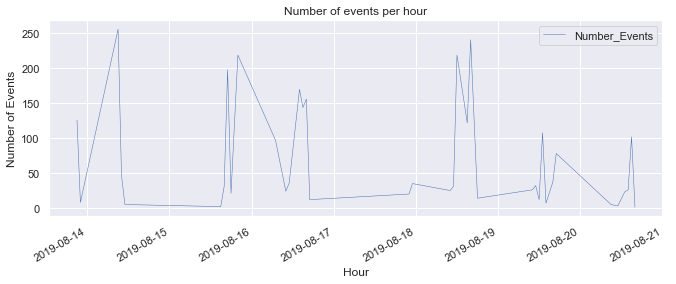

In [90]:
import matplotlib.pyplot as plt
# Will allow us to embed images in the notebook
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
df_date_time.plot(x='Hour', y='Number_Events', linewidth=0.5);
plt.title("Number of events per hour")
plt.ylabel("Number of Events")
plt.xlabel("Hour")
plt.show()

### Example JSON analysis

This second example analysis shows how we might interogate the JSON `content` field in order to extract properties for
analysis.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 5 columns):
event_time_stamp    2910 non-null object
beacon_id           2324 non-null object
content_type        2910 non-null object
content             2910 non-null object
datetime_hour       2910 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 113.8+ KB


In [92]:
import json

df['content_json'] = df['content'].apply(json.loads) #Creating a column with the JSON content
df_content = pd.io.json.json_normalize(df['content_json']) #Helper function to create flat table from nested JSON


In [93]:
# remove NA's from the browser hostname data
df_hostname = df_content.loc[:,['browser.page.url.hostname', 'time.stamp']].dropna()
# create an hourly column
date_format='%Y-%m-%dT%H:%M:%S.%f'
df_hostname['datetime_hour'] = df_hostname['time.stamp'].apply(lambda x: convert_to_datetime_hour(x, date_format))
# renaming columns
df_hostname.columns = ['Hostname', 'Datetime', 'Hour'] # grouping and counting events by hostname by hour


In [94]:
sorted_df = df_hostname.groupby(['Hostname']).count().reset_index().sort_values(by=['Datetime'], ascending=False)
sorted_df = sorted_df[0:5]

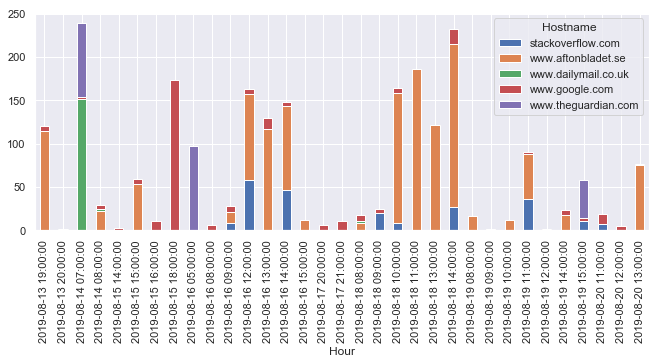

In [95]:
# plotting bar chart over time
df_hostname_popular = df_hostname[df_hostname.Hostname.isin(sorted_df['Hostname'].unique())]
df_hostname_popular.groupby(['Hour','Hostname']).size().unstack().plot(kind='bar', stacked='True')


The following code prints out the content fields for a single `beacon-in-view-event` to illustrate the fields it contains. It should be noted that `beacon.meta.html`contains a large amount of html data to process.

In [96]:
#from pprint import pprint
#pprint(json.loads(df[df['content_type'].isin(["application/vnd.tobii.atex.beacon-in-view-event-v1+json"])].iloc[0]['content']))

{'beacon': {'height': '94',
            'id': 'cff73bae-7abc-44e3-ab35-3cd9eb6e64b6',
            'in_view_ratio_percentile': '100',
            'meta': {'ad': {'video': {'subtype': 'Overlay', 'type': 'Instream'},
                            'youtubeformat': 'Overlay'},
                     'html': '<div class="ytp-ad-image-overlay" '
                             'style="max-width: 728px;"><div '
                             'class="ytp-ad-overlay-ad-info-button-container"><span '
                             'class="ytp-ad-hover-text-button '
                             'ytp-ad-info-hover-text-button" '
                             'id="ad-info-hover-text-button:1q" '
                             'style=""><button class="ytp-ad-button '
                             'ytp-ad-button-link ytp-ad-clickable" '
                             'id="button:1r" style=""><span '
                             'class="ytp-ad-button-icon"><svg fill="#fff" '
                             'height="100%" 

### Analytical Question Suggestions



1. Within the content JSON object there are a large number of interesting fields to extract and visualise such as the
`beacon.height`, the `beacon.width` or the `browser.page.url.hostname`. Explore some of these variables graphically to
understand the ads.

1. There is a specific field within content `beacon.meta.html`, which contains the html code found within the beacon.
You could explore using regular expressions or text mining to try and identify url's that are contained here.

1. Given the different events it is possible to try and calculate some metrics which might be interesting. Each
beacon_id should have a `beacon-detected-event-v1+json`, but only a fraction of these beacon_ids have a
`atex.beacon-in-view-event-v1+json`. It is possible to calculate this fraction and possibly intersting to see how it 
varies for different websites.


### Modelling Question Suggestions

Although each event is quite large, there are not a huge number of distinct events to undertake prediction. However it
is interesting to model which variables may be correlated and could act as predictors of others. Suggested models
include.

1. `Regression model`:- Counting the number of distinct beacons per session and predicting this number from a combination
    of the website and time of day.
    
1. `Classification Model`:- Using the beacon_width or beacon_height, and the time of day to predict which website a beacon
    appears on.
    
1. `Time Series Model`:- Calculating the number of beacons or number of sessions per hour and trying to see any periodicity
    in this or predict this value for the next period.